<a href="https://colab.research.google.com/github/sanu4satyam/Credit_Card_Approval_ML/blob/main/Credit_Card_Approval_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Credit card applications
<p>Commercial banks receive a lot of applications for credit cards. Many of them get rejected for many reasons, like high loan balances, low income levels, or too many inquiries on an individual's credit report, for example. Manually analyzing these applications is mundane, error-prone, and time-consuming (and time is money!). Luckily, this task can be automated with the power of machine learning and pretty much every commercial bank does so nowadays. In this notebook, we will build an automatic credit card approval predictor using machine learning techniques, just like the real banks do.</p>
<p><img src="https://www.danaconnect.com/wp-content/uploads/2021/06/1623959868319-1024x607.png" alt="Credit card being held in hand"></p>
<p>We'll use the <a href="http://archive.ics.uci.edu/ml/datasets/credit+approval">Credit Card Approval dataset</a> from the UCI Machine Learning Repository. The structure of this notebook is as follows:</p>
<ul>
<li>First, we will start off by loading and viewing the dataset.</li>
<li>Then, the dataset has a mixture of both numerical and non-numerical features, that it contains values from different ranges, plus that it contains a number of missing entries.</li>
<li>Preprocess the dataset to ensure the machine learning model we choose can make good predictions.</li>
<li>After our data is in good shape, we will do some exploratory data analysis to build our intuitions.</li>
<li>Finally, build machine learning models that can predict if an individual's application for a credit card will be accepted.</li>
</ul>

In [ ]:
# Import pandas
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Load dataset
cc_apps = pd.read_csv("/content/cc_approvals.data", header= None)

# Inspect data
print(cc_apps.head(10))
print("----    ----    ----    ----    ----    ----    ----    ----    ----    ----    ----")
# Inspect missing values in the dataset
print(cc_apps.tail(10))

  0      1       2  3  4   5  6      7  8  9   10 11 12     13     14 15
0  b  30.83   0.000  u  g   w  v  1.250  t  t   1  f  g  00202      0  +
1  a  58.67   4.460  u  g   q  h  3.040  t  t   6  f  g  00043    560  +
2  a  24.50   0.500  u  g   q  h  1.500  t  f   0  f  g  00280    824  +
3  b  27.83   1.540  u  g   w  v  3.750  t  t   5  t  g  00100      3  +
4  b  20.17   5.625  u  g   w  v  1.710  t  f   0  f  s  00120      0  +
5  b  32.08   4.000  u  g   m  v  2.500  t  f   0  t  g  00360      0  +
6  b  33.17   1.040  u  g   r  h  6.500  t  f   0  t  g  00164  31285  +
7  a  22.92  11.585  u  g  cc  v  0.040  t  f   0  f  g  00080   1349  +
8  b  54.42   0.500  y  p   k  h  3.960  t  f   0  f  g  00180    314  +
9  b  42.50   4.915  y  p   w  v  3.165  t  f   0  t  g  00052   1442  +
----    ----    ----    ----    ----    ----    ----    ----    ----    ----    ----
    0      1       2  3  4   5   6      7  8  9   10 11 12     13   14 15
680  b  19.50   0.290  u  g   k   v  0

## 2. Inspecting the applications
<p>The features of this dataset have been anonymized to protect the privacy, but <a href="http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html">this blog</a> gives us a pretty good overview of the probable features. The probable features in a typical credit card application are <code>Gender</code>, <code>Age</code>, <code>Debt</code>, <code>Married</code>, <code>BankCustomer</code>, <code>EducationLevel</code>, <code>Ethnicity</code>, <code>YearsEmployed</code>, <code>PriorDefault</code>, <code>Employed</code>, <code>CreditScore</code>, <code>DriversLicense</code>, <code>Citizen</code>, <code>ZipCode</code>, <code>Income</code> and finally the <code>ApprovalStatus</code>.</p>
<p>The co-relation among the variables are not very strong. So there's no need to treat multi-colinearity</p>

In [ ]:
# Summary statistics
cc_apps.describe()

,2,7,10,14
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [ ]:
# DataFrame information
cc_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      690 non-null    object 
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


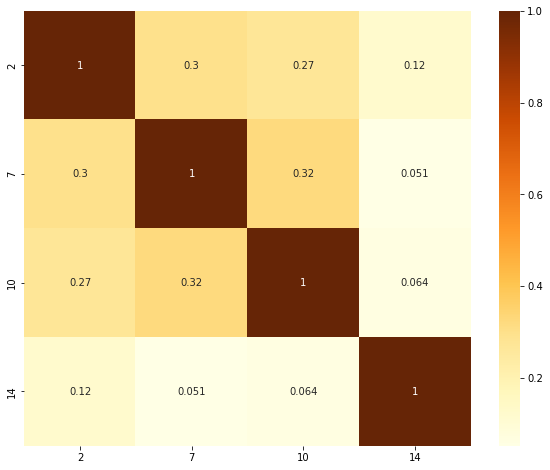

In [ ]:
#Finding Correlation
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(cc_apps.corr(), annot= True, cmap="YlOrBr")
plt.show()

## 3. Splitting the dataset into train and test sets
<p>Split our data into train set and test set to prepare our data for two different phases of machine learning modeling: <strong>"Training and Testing"</strong>.</p>
<p>Features like <code>DriversLicense</code> and <code>ZipCode</code> are not as important as the other features in the dataset for predicting credit card approvals. Dropping them to design our machine learning model with the best set of features. </p>

In [ ]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

# Droping the features 11 and 13
cc_apps = cc_apps.drop([11,13], axis=1)

# Spliting into train and test sets
cc_apps_train, cc_apps_test = train_test_split(cc_apps, test_size=0.25, random_state= 1)

## 4. Handling the missing values
The missing values in the dataset are labeled with '?'.

In [ ]:
import numpy as np

# Replacing '?'s with NaN in the train and test sets
cc_apps_train = cc_apps_train.replace('?', np.nan)
cc_apps_test = cc_apps_test.replace('?', np.nan)

In [ ]:
# Imputing the missing values with mean
cc_apps_train.fillna(cc_apps_train.mean(), inplace=True)
cc_apps_test.fillna(cc_apps_test.mean(), inplace=True)

# Counting the number of NaNs
print(cc_apps_train.isna().sum())
print(cc_apps_test.isna().sum())

0      7
1     10
2      0
3      6
4      6
5      7
6      7
7      0
8      0
9      0
10     0
12     0
14     0
15     0
dtype: int64
0     5
1     2
2     0
3     0
4     0
5     2
6     2
7     0
8     0
9     0
10    0
12    0
14    0
15    0
dtype: int64


<p>Imputing these missing values with the <strong>most frequent values (Mode)</strong> as present in the respective columns. </p>

In [ ]:
#Filling Mode in Categorical Columns
for col in cc_apps_train.columns:
    if cc_apps_train[col].dtypes == 'object':
        cc_apps_train = cc_apps_train.fillna(cc_apps_train[col].mode()[0])
        cc_apps_test = cc_apps_test.fillna(cc_apps_test[col].mode()[0])


print(cc_apps_train.isna().sum())
print(cc_apps_test.isna().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
12    0
14    0
15    0
dtype: int64
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
12    0
14    0
15    0
dtype: int64


## 5. Preprocessing the data
*   Converting the non-numeric data into numeric.
*   Scaling the feature values to a uniform range.

In [ ]:
# Converting the categorical features in the train and test sets independently
cc_apps_train = pd.get_dummies(cc_apps_train, drop_first= True)
cc_apps_test = pd.get_dummies(cc_apps_test, drop_first= True)

# Reindexing the columns of the test set aligning with the train set
cc_apps_test = cc_apps_test.reindex(columns= cc_apps_train.columns, fill_value= 0)

In [ ]:
# Importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Segregating features and labels into separate variables
X_train, y_train = cc_apps_train.iloc[:,:-1].values, cc_apps_train.iloc[:,[-1]].values
X_test, y_test = cc_apps_test.iloc[:,:-1].values, cc_apps_test.iloc[:,[-1]].values

# MinMaxScaler to rescale X_train and X_test
scaler = MinMaxScaler()
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

## 6. Fitting classification models to the train set
<p>Essentially, predicting if a credit card application will be approved or not is a <strong>Classification</strong> task. According to UCI, our dataset contains more instances that correspond to <strong>"Denied"</strong> status than instances corresponding to <strong>"Approved"</strong> status. Specifically, out of <strong>690 instances</strong>, there are <strong>383 (55.5%)</strong> applications that got denied and <strong>307 (44.5%)</strong> applications that got approved. </p>

<p>Also, the dataset is not imbalanced.

In [ ]:
# Importing LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiating a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fitting logreg to the train set
logreg.fit(rescaledX_train, y_train)

LogisticRegression()

## 7. Making predictions and evaluating performance
<p>Evaluating the model on the test set with respect to <strong>classification accuracy</strong>. Also take a look the model's <strong>confusion matrix</strong>.  </p>

Accuracy of logistic regression classifier:  0.838150289017341
              precision    recall  f1-score   support

           0       0.75      0.93      0.83        75
           1       0.94      0.77      0.84        98

    accuracy                           0.84       173
   macro avg       0.85      0.85      0.84       173
weighted avg       0.86      0.84      0.84       173



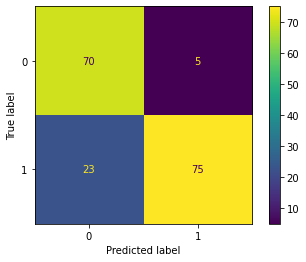

In [ ]:
# Importing confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledX_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test, y_test))

# Classification Report
from sklearn. metrics import classification_report
print(classification_report(y_test, y_pred))

# Confusion matrix of the logreg model
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

## 8. Grid searching and making the Logistic Regressor to perform better
<p>Model was pretty good! In fact it was able to yield an accuracy score of <strong>84%.</strong></p>
<p>Performing <strong>grid search</strong> of the model parameters to improve the model's ability to predict credit card approvals.</p>

In [ ]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the grid of values for tol and max_iter
tol = [0.01,0.001, 0.0001]
max_iter = [50,100,150,200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol= tol, max_iter= max_iter)

## 9. Finding the best performer
<p>Grid search to see which values perform best.</p>
<p>Instantiated <code>GridSearchCV()</code> with our earlier <code>logreg</code> model with all the data we have. Also instructed <code>GridSearchCV()</code> to perform a cross-validation</a> of five folds.</p>

In [ ]:
# GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid= param_grid, cv=5)

# Fitting grid_model to the data
grid_model_result = grid_model.fit(rescaledX_train, y_train)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

# Extracting the best model
best_model = grid_model_result.best_estimator_
print("Accuracy of logistic regression classifier: ", best_model.score(rescaledX_test,y_test))

Best: 0.856740 using {'max_iter': 50, 'tol': 0.01}
Accuracy of logistic regression classifier:  0.838150289017341


## 10. Finding the best performing model using Ensemble Models

After <strong>Hyperparameter Tuning</strong> using GridSearchCV we can only able to get <strong>2%</strong> more accuracy with <strong>"Learning Rate of 0.01, Iterations are 50 and Cross Validation of 5"</strong>.<p> Now, Going to try Ensemble machine learning models to find the best performance</p>

In [ ]:
# Importing RandomForest, AdaBoost, GradientBoost
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

#Instantiating
RF = RandomForestClassifier()
ADA = AdaBoostClassifier()
GB = GradientBoostingClassifier(learning_rate=0.01)

Classifiers = [RF,ADA,GB]

#Importing Accuracy Score
from sklearn.metrics import accuracy_score

RandomForestClassifier()
	 Accuracy Score is:  0.9248554913294798
	 Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.92      0.91        75
           1       0.94      0.93      0.93        98

    accuracy                           0.92       173
   macro avg       0.92      0.92      0.92       173
weighted avg       0.93      0.92      0.92       173

	 Confusion Matrix: 



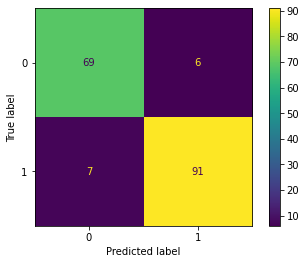




AdaBoostClassifier()
	 Accuracy Score is:  0.8786127167630058
	 Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.88      0.86        75
           1       0.91      0.88      0.89        98

    accuracy                           0.88       173
   macro avg       0.88      0.88      0.88       173
weighted avg       0.88      0.88      0.88       173

	 Confusion Matrix: 



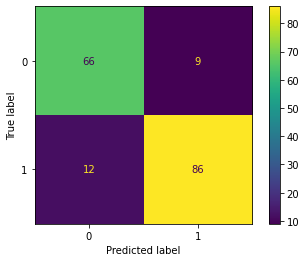




GradientBoostingClassifier(learning_rate=0.01)
	 Accuracy Score is:  0.8728323699421965
	 Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.91      0.86        75
           1       0.92      0.85      0.88        98

    accuracy                           0.87       173
   macro avg       0.87      0.88      0.87       173
weighted avg       0.88      0.87      0.87       173

	 Confusion Matrix: 



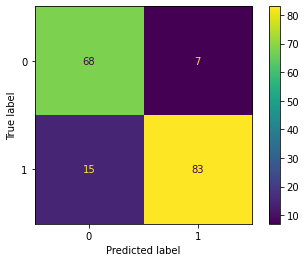

In [ ]:
for model in Classifiers:
  model.fit(rescaledX_train, y_train)
  predictions = model.predict(rescaledX_test)
  print(model)
  print("\t Accuracy Score is: ", accuracy_score(y_test, predictions))
  print("\t Classification Report: \n", classification_report(y_test, predictions))
  print("\t Confusion Matrix: \n")
  ConfusionMatrixDisplay.from_predictions(y_test, predictions)
  plt.show()
  print("\n\n")

<p>While building this credit card predictor, tackled some of the most widely-known preprocessing steps such as <strong>scaling</strong>, <strong>label encoding</strong>, and <strong>missing value imputation</strong>. Finished with some <strong>machine learning</strong> to predict if a person's application for a credit card would get approved or not given some information about that person.</p>
<p>The best model is <strong>RandomForestClassifier</strong> which uses Ensemble learning method using Bagging Technique. The model has accuracy score of <strong>92</strong> using deafult hyperparameters.</p>